In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("diamonds_new.csv")
df.head(19)

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0
6,0.24,Very Good,I,VVS1,57.0,3.95,3.98,2.47,168.0
7,0.26,Very Good,H,SI1,55.0,4.07,4.11,2.53,168.5
8,0.22,Fair,E,VS2,61.0,3.87,3.78,2.49,168.5
9,0.23,Very Good,H,VS1,61.0,4.00,4.05,2.39,169.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [5]:
df.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

<Axes: >

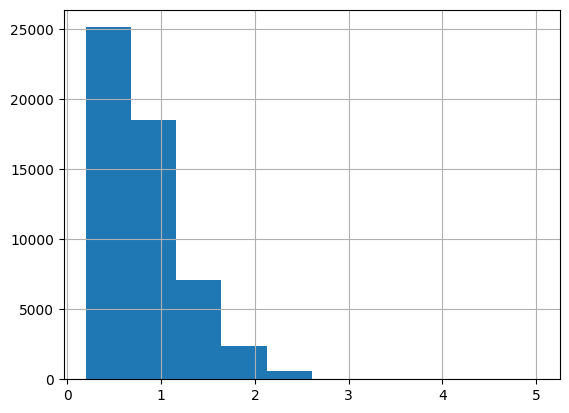

In [8]:
df['carat'].hist()

<Axes: >

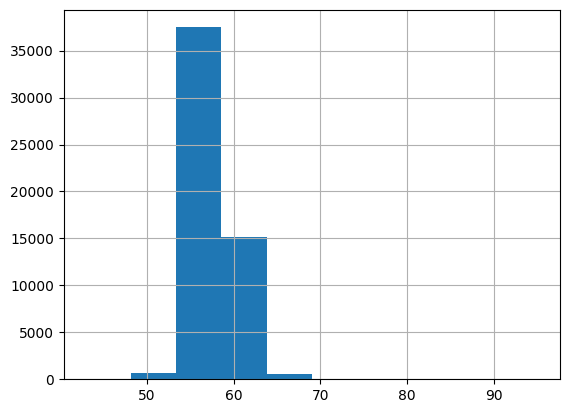

In [9]:
df['table'].hist()

In [10]:
df.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [11]:
df[(df['x']==0) | (df['y']==0) | (df['z']==0)].index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [12]:
df2 = df.drop([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557])

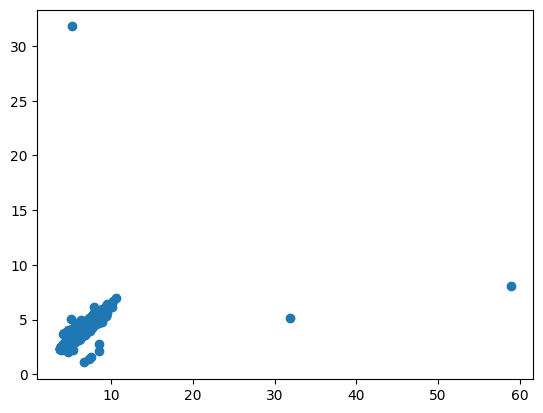

In [13]:
plt.scatter(df2['y'], df2['z'])
plt.show()

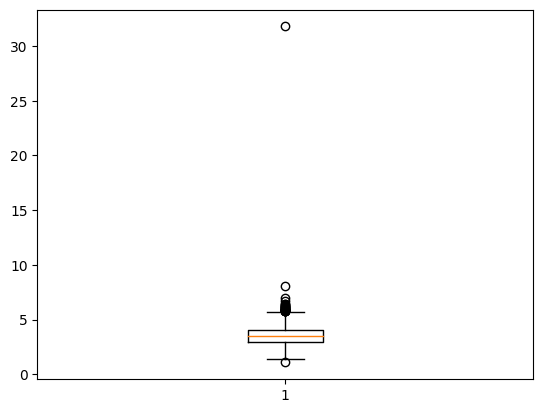

In [15]:
plt.boxplot(df2['z'])
plt.show()

In [16]:
df2[(df2['y'] > 15) | (df2['z'] > 15)].index

Int64Index([24067, 48410, 49189], dtype='int64')

In [17]:
df3 = df2.drop([24067, 48410, 49189])

In [18]:
df3.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [26]:
df3['carat'].fillna(df3['carat'].median(), inplace=True)
df3['table'].fillna(df3['table'].median(), inplace=True)
df3['color'].fillna("G", inplace=True)

In [27]:
df3.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [28]:
df3.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [29]:
y = df3['price_new']
x = df3.drop("price_new", axis=1)

In [30]:
x = pd.get_dummies(x)

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [32]:
mn = MinMaxScaler()
x = mn.fit_transform(x)

In [34]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state= 134)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [36]:
x.shape

(53929, 25)

In [51]:
### input = 25, hidden1 = 32, hidden2 = 16, hidden3 = 8, output = 1

In [44]:
model1 = Sequential()
model1.add(Dense(32, activation = "relu", input_shape = (25,)))
model1.add(Dense(16, activation = "relu"))
model1.add(Dense(8, activation = "relu"))
model1.add(Dense(1, activation = None))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                832       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [45]:
model1.compile(optimizer = "sgd", loss = "mean_squared_error", metrics = ["mean_squared_error"])

In [46]:
model1.fit(x_train, y_train, epochs = 10, batch_size = 128)

Epoch 1/10
338/338 [==============================] - 1s 2ms/step - loss: 6928083.0000 - mean_squared_error: 6928083.0000
Epoch 2/10
338/338 [==============================] - 1s 2ms/step - loss: 3997926.5000 - mean_squared_error: 3997926.5000
Epoch 3/10
338/338 [==============================] - 0s 1ms/step - loss: 3997847.5000 - mean_squared_error: 3997847.5000
Epoch 4/10
338/338 [==============================] - 0s 1ms/step - loss: 3998057.5000 - mean_squared_error: 3998057.5000
Epoch 5/10
338/338 [==============================] - 1s 1ms/step - loss: 3998105.5000 - mean_squared_error: 3998105.5000
Epoch 6/10
338/338 [==============================] - 0s 1ms/step - loss: 3998069.0000 - mean_squared_error: 3998069.0000
Epoch 7/10
338/338 [==============================] - 0s 1ms/step - loss: 3998076.2500 - mean_squared_error: 3998076.2500
Epoch 8/10
338/338 [==============================] - 0s 1ms/step - loss: 3998290.7500 - mean_squared_error: 3998290.7500
Epoch 9/10
338/338 [====

In [47]:
model1.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 3896237.0000 - mean_squared_error: 3896237.0000


[3896237.0, 3896237.0]

model2 

In [53]:
model2 = Sequential()
model2.add(Dense(64, input_shape = (25,), activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(1, activation = None))

In [54]:
model2.compile(optimizer = "sgd", loss = "mean_squared_error", metrics = ["mean_squared_error"])
model2.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
338/338 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 2/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 3/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 4/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 5/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 6/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 7/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 8/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 9/30
338/338 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 10/30
338/338 [==============================] - 1s 2ms/st

Model 3

In [56]:
model3 = Sequential()
model3.add(Dense(128, input_shape = (25,), activation = "relu"))
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(64, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(64, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(32, activation = "relu"))
model3.add(Dense(16, activation = "relu"))
model3.add(Dense(1, activation = None))

In [57]:
model3.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mean_squared_error"])
model3.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
338/338 [==============================] - 2s 4ms/step - loss: 1961572.0000 - mean_squared_error: 1961572.0000
Epoch 2/30
338/338 [==============================] - 1s 4ms/step - loss: 224062.7188 - mean_squared_error: 224062.7188
Epoch 3/30
338/338 [==============================] - 1s 3ms/step - loss: 201713.5625 - mean_squared_error: 201713.5625
Epoch 4/30
338/338 [==============================] - 1s 3ms/step - loss: 196894.2969 - mean_squared_error: 196894.2969
Epoch 5/30
338/338 [==============================] - 1s 3ms/step - loss: 188862.1406 - mean_squared_error: 188862.1406
Epoch 6/30
338/338 [==============================] - 1s 3ms/step - loss: 189540.8125 - mean_squared_error: 189540.8125
Epoch 7/30
338/338 [==============================] - 1s 4ms/step - loss: 186781.4062 - mean_squared_error: 186781.4062
Epoch 8/30
338/338 [==============================] - 1s 4ms/step - loss: 182298.6719 - mean_squared_error: 182298.6719
Epoch 9/30
338/338 [==================

In [65]:
model3.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 365414.7500 - mean_squared_error: 365414.7500


[365414.75, 365414.75]

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [59]:
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

310612.43175525905

### Assignment starts

In [60]:
from tensorflow.keras.regularizers import l2

Model 4

In [75]:
model4 = Sequential()
model4.add(Dense(128, input_shape = (25,), activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dense(128, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.15))
model4.add(Dense(128, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.15))
model4.add(Dense(64, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.15))
model4.add(Dense(64, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.15))
model4.add(Dense(32, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.15))
model4.add(Dense(16, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.15))
model4.add(Dense(8, activation = "relu", kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.15))
model4.add(Dense(1, activation = None))

In [76]:
model4.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mean_squared_error"])
model4.fit(x_train, y_train, epochs = 40, batch_size = 128)

Epoch 1/40
338/338 [==============================] - 3s 4ms/step - loss: 2593237.0000 - mean_squared_error: 2593230.0000
Epoch 2/40
338/338 [==============================] - 1s 4ms/step - loss: 740962.3750 - mean_squared_error: 740955.8125
Epoch 3/40
338/338 [==============================] - 1s 4ms/step - loss: 653989.3125 - mean_squared_error: 653982.5625
Epoch 4/40
338/338 [==============================] - 1s 4ms/step - loss: 617622.6250 - mean_squared_error: 617615.7500
Epoch 5/40
338/338 [==============================] - 1s 4ms/step - loss: 601133.0000 - mean_squared_error: 601125.8750
Epoch 6/40
338/338 [==============================] - 1s 4ms/step - loss: 591350.1875 - mean_squared_error: 591343.4375
Epoch 7/40
338/338 [==============================] - 1s 4ms/step - loss: 592676.0000 - mean_squared_error: 592669.1250
Epoch 8/40
338/338 [==============================] - 1s 4ms/step - loss: 587990.8750 - mean_squared_error: 587984.0625
Epoch 9/40
338/338 [==================

In [77]:
model4.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 145180.0625 - mean_squared_error: 145170.3438


[145180.0625, 145170.34375]